Autor de la práctica: Maldonado Aguilar Angel Julian.

# Regresión lineal múltiple


### 0. Instalación y carga de paquetes.

In [1]:
install.packages("corrgram")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [2]:
library("corrgram")
library("dplyr")
library("MASS")  # Para poder usar la funcion stepAIC


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘MASS’


The following object is masked from ‘package:dplyr’:

    select




### 1. Carga de datos.

In [3]:
df <- read.csv("Consumo_cerveja.csv")
str(df)

'data.frame':	365 obs. of  7 variables:
 $ Data             : chr  "01/01/2015" "02/01/2015" "03/01/2015" "04/01/2015" ...
 $ TemperaturaMedia : num  27.3 27 24.8 24 23.8 ...
 $ TemperaturaMinima: num  23.9 24.5 22.4 21.5 21 20.1 19.5 19.5 21.9 22.1 ...
 $ TemperaturaMaxima: num  32.5 33.5 29.9 28.6 28.3 30.5 33.7 32.8 34 34.2 ...
 $ Precipitacao     : num  0 0 0 1.2 0 12.2 0 48.6 4.4 0 ...
 $ FinaldeSemana    : int  0 0 1 1 0 0 0 0 0 1 ...
 $ Consumodecerveja : num  25.5 29 30.8 29.8 28.9 ...


In [4]:
head(df$Data)

[1] "01/01/2015" "02/01/2015" "03/01/2015" "04/01/2015" "05/01/2015"
[6] "06/01/2015"

In [5]:
tail(df$Data)

[1] "26/12/2015" "27/12/2015" "28/12/2015" "29/12/2015" "30/12/2015"
[6] "31/12/2015"

El conjunto de datos proporcionadas cuenta con 365 observaciones y 7 variables.

Si revisamos la variable Data, podemos observar que el conjunto de observaciones corresponden a una medida tomada por día durante todos los días del año 2015 en la ciudad de Sao Paulo.

Se elimina la columna "Data", quedandonos asi solo con las 5 variables predictoras y la variable de respuesta.

In [6]:
df$Data <- NULL
head(df)

,TemperaturaMedia,TemperaturaMinima,TemperaturaMaxima,Precipitacao,FinaldeSemana,Consumodecerveja
,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>
1,27.30,23.9,32.5,0.0,0,25.461
2,27.02,24.5,33.5,0.0,0,28.972
3,24.82,22.4,29.9,0.0,1,30.814
4,23.98,21.5,28.6,1.2,1,29.799
5,23.82,21.0,28.3,0.0,0,28.900
6,23.78,20.1,30.5,12.2,0,28.218


## Análisis exploratorio

### 2. Exploración de variables. Distribución.

#### Variable: TemperaturaMedia

In [7]:
summary(df$TemperaturaMedia)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  12.90   19.02   21.38   21.23   23.28   28.86 

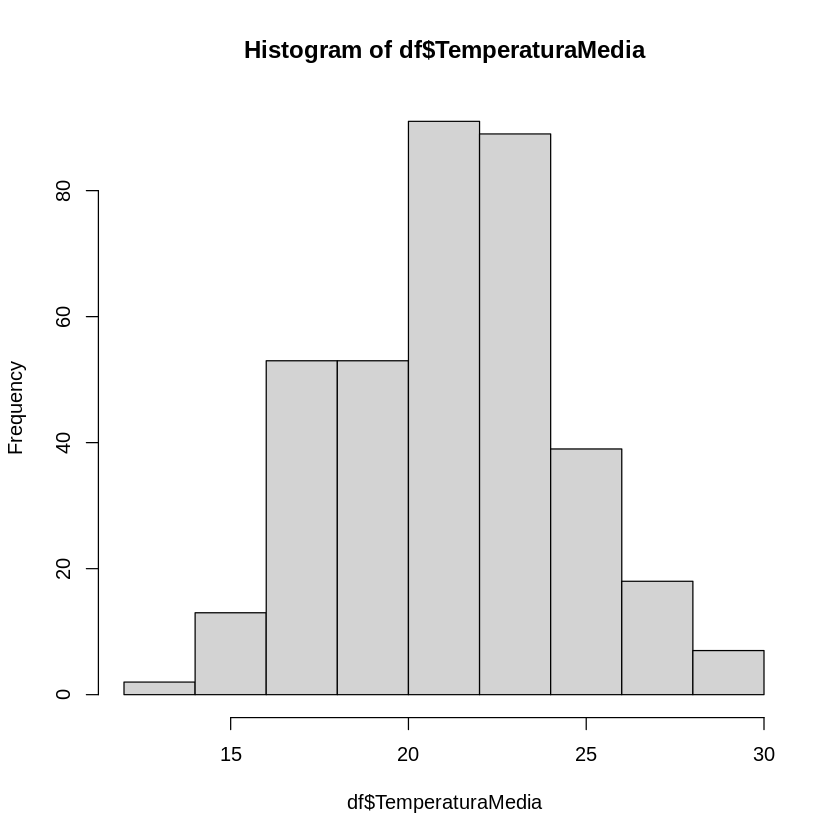

In [8]:
hist(df$TemperaturaMedia)

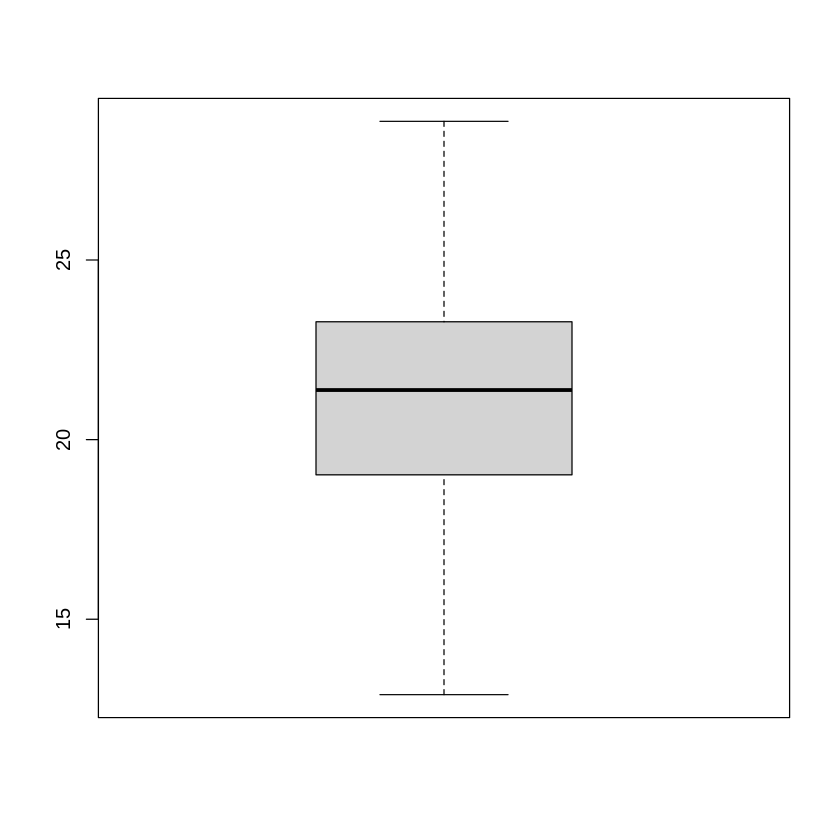

In [9]:
boxplot(df$TemperaturaMedia)

En promedio la temperatura media se encuentra en los 21.3 °C, con un mínimo de 12.9 °C y máximo de 28.9 °C.

El histograma de freciencias nos muestra que las temperaturas medias mas frecuentes rondan entre los 20 a 24 °C.

Mientras que en el boxplot podemos observar que el conjunto de datos no presenta ningún valor atípico, algo de esperarse ya que son las temperaturas medias de cada observación.

#### Variable: TemperaturaMinima

In [10]:
summary(df$TemperaturaMinima)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  10.60   15.30   17.90   17.46   19.60   24.50 

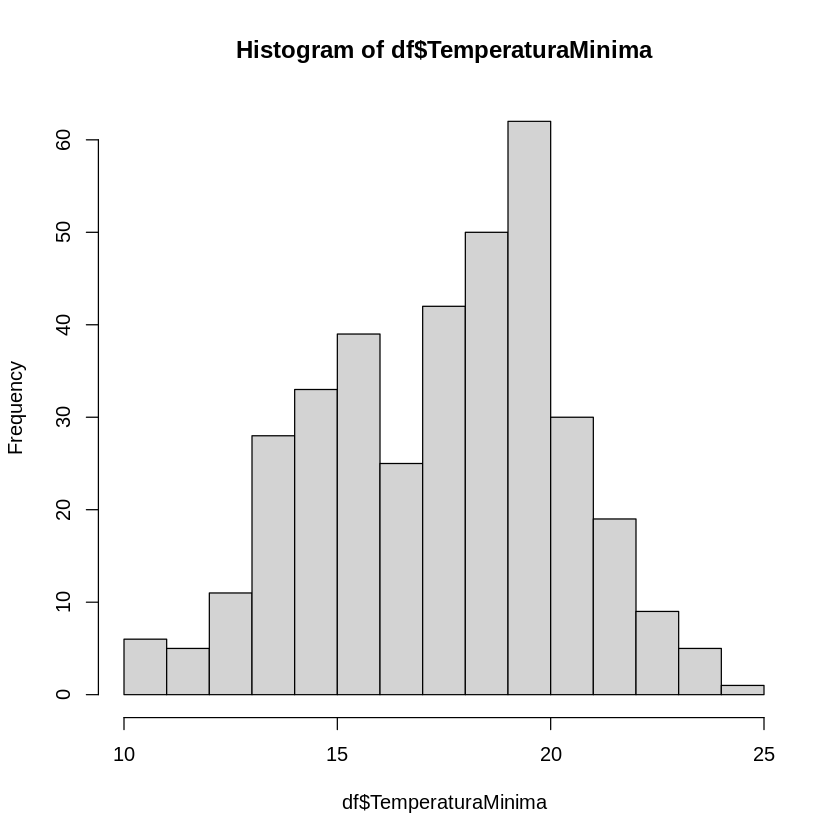

In [11]:
hist(df$TemperaturaMinima)

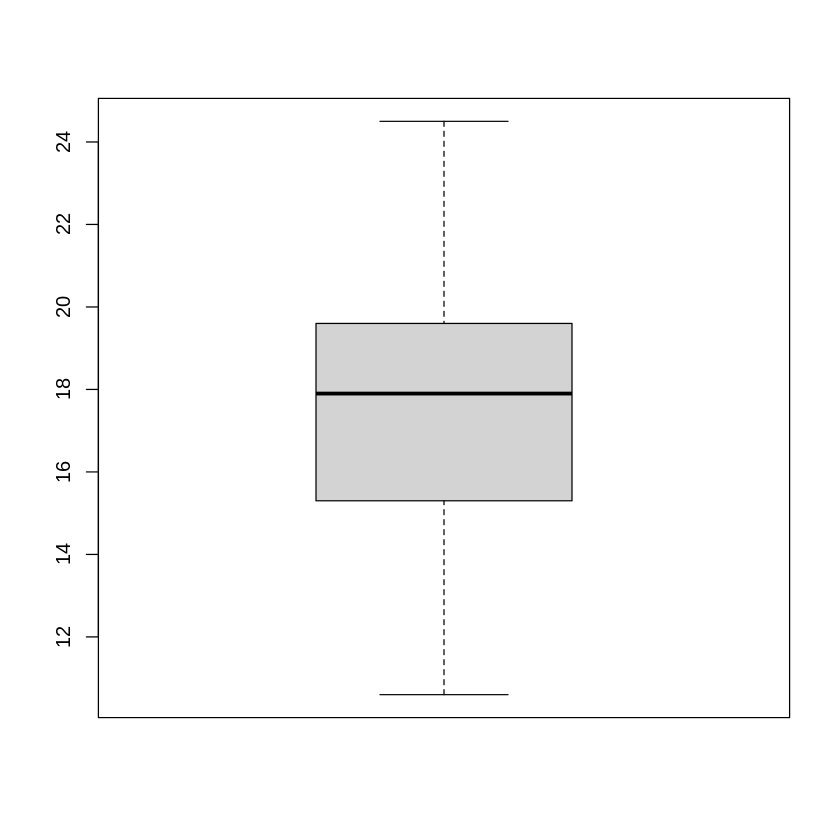

In [12]:
boxplot(df$TemperaturaMinima)

En los resultados anteriores observamos la temperatura mínima de todas las observaciones fue de 10.6 °C, mientras que la temperatura más alta dentro de las temperaturas mínimas fue de 24.5 °C, y una media de 17.5 °C.

En el histograma observamos que la temperatura mínima más recurrente fue de 19 °C.

El el diagrama de caja observamos que las observaciones de las temperaturas mínimas estan distribuidas más al centro del conjunto de datos registrado, lo cual podemos corroborar tambien en el histograma de frecuencias, donde si quitamos la frecuencia más alta de 19°C podemos ver que la distribución de los datos tiene casi una forma de campana.



#### Variable: TemperaturaMaxima

In [13]:
summary(df$TemperaturaMaxima)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  14.50   23.80   26.90   26.61   29.40   36.50 

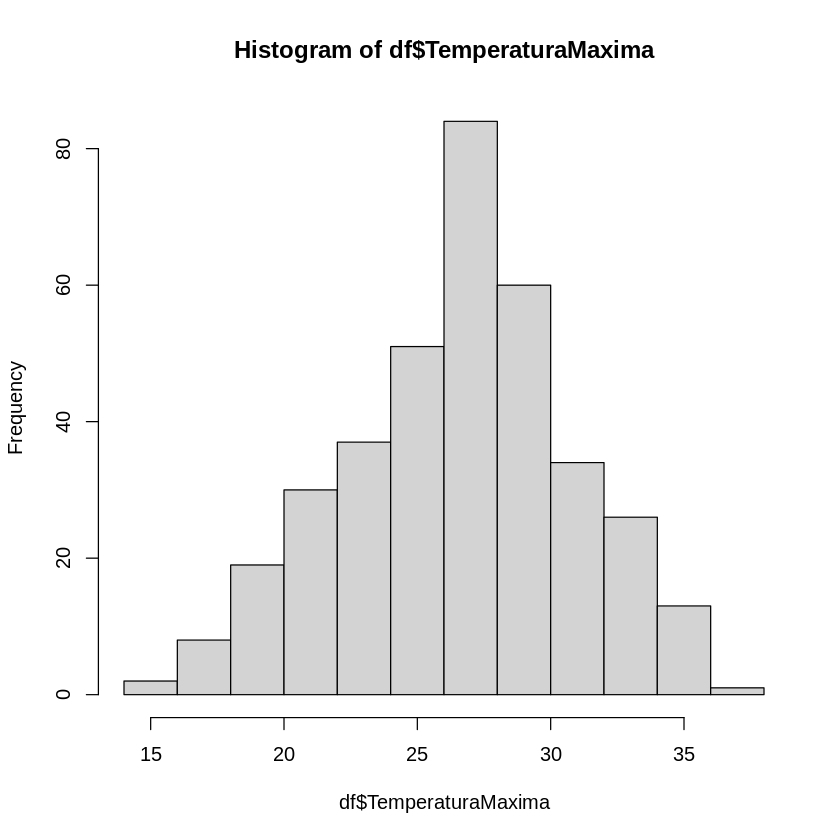

In [14]:
hist(df$TemperaturaMaxima)

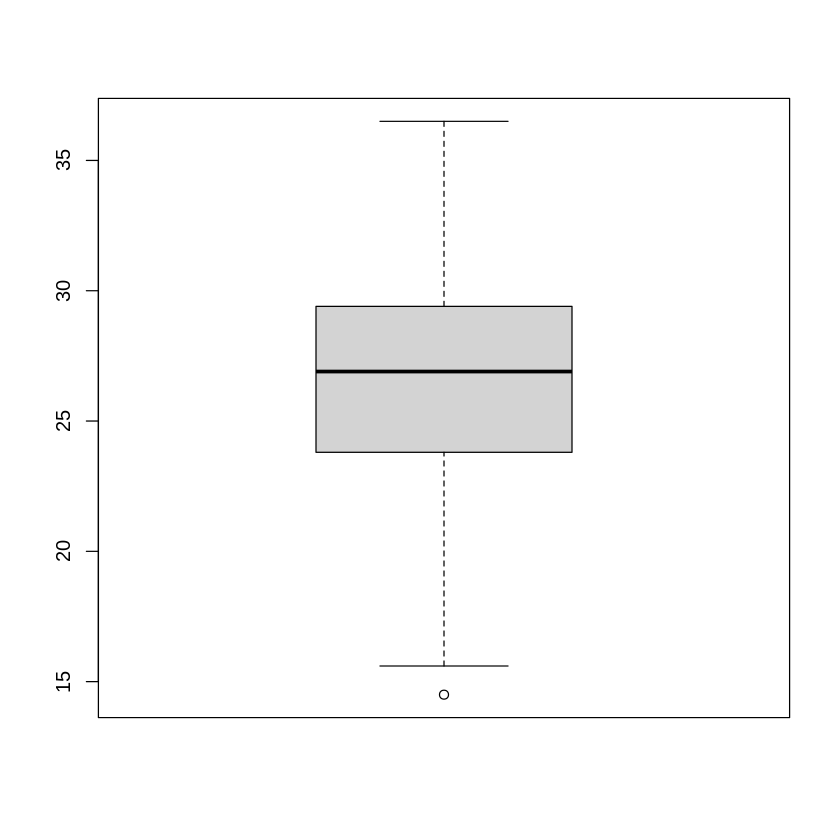

In [15]:
boxplot(df$TemperaturaMaxima)

De la exploración anterior podemos observar que la temperatura máxima registrada en el año fue de 36.5 °C, mientras que la mínima de las temperaturas máximas fue de 14.5 °C. En promedio las temperaturas máximas rondan los 26.6 °C, lo cual coincide tambien con la mayor frecuencia de temperaturas máximas observadas en el histograma, de aproximadamente 26 a 27 °C.

En el diagrama de cajas observamos un comportamiento algo similar a las temperaturas mínimas, en ambas las observaciones se concentran en el centro de los datos. Algo a remarcar es el valor atípico registrado como una temperatura máxima baja, la cual muy probablemente es la temperatura mínima de 14.5 °C mostrada en el resumen.

#### Variable: Precipitacao	

In [16]:
summary(df$Precipitacao)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   0.000   0.000   5.197   3.200  94.800 

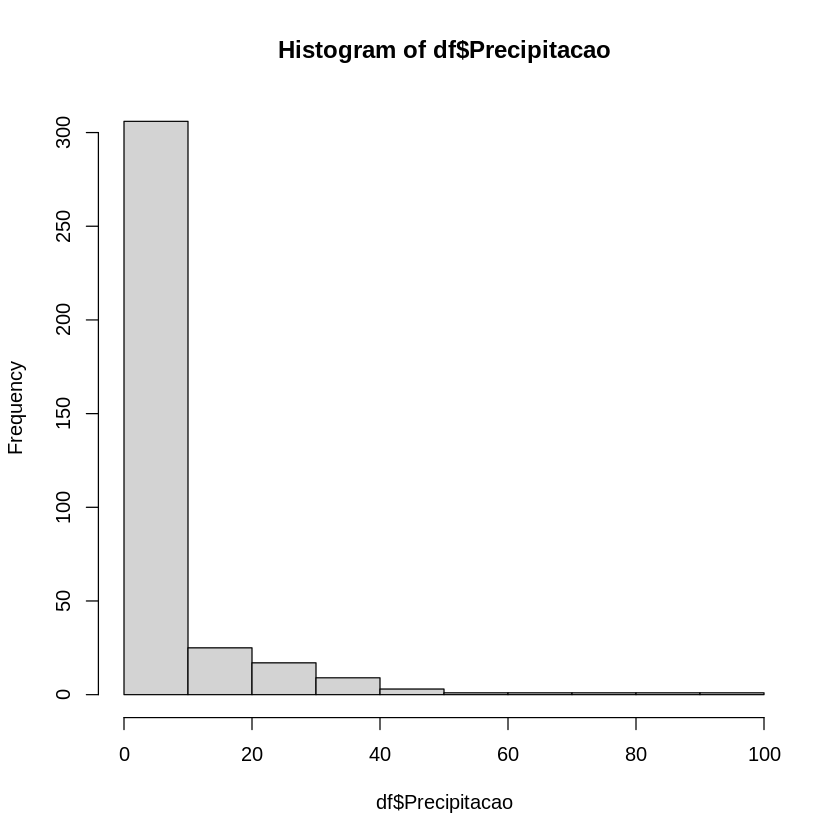

In [17]:
hist(df$Precipitacao)

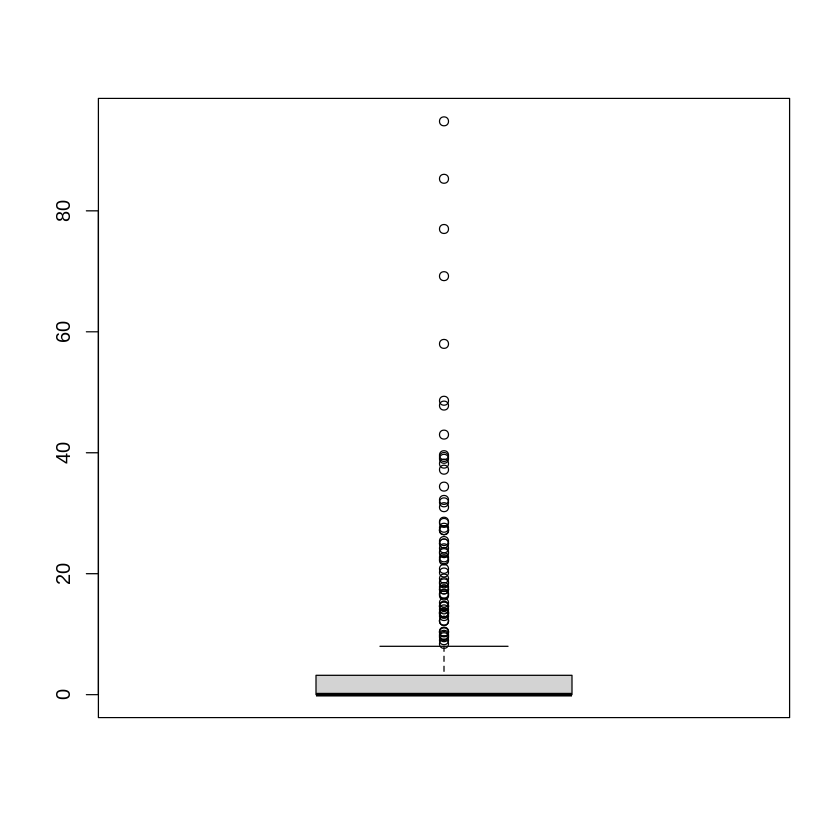

In [18]:
boxplot(df$Precipitacao)

Los 3 resultados muestran que en la ciudad de Sao Paulo llovió poco en el año 2015, si bien hay varias observaciones que señalan lluvias ligeras, los valores atipicos muestran que son ocasionales las lluvias moderadas y muy extrañamente se presentaron lluvias fuertes.

#### Variable: FinaldeSemana

In [19]:
tab <- table(df$FinaldeSemana)
tab


  0   1 
261 104 

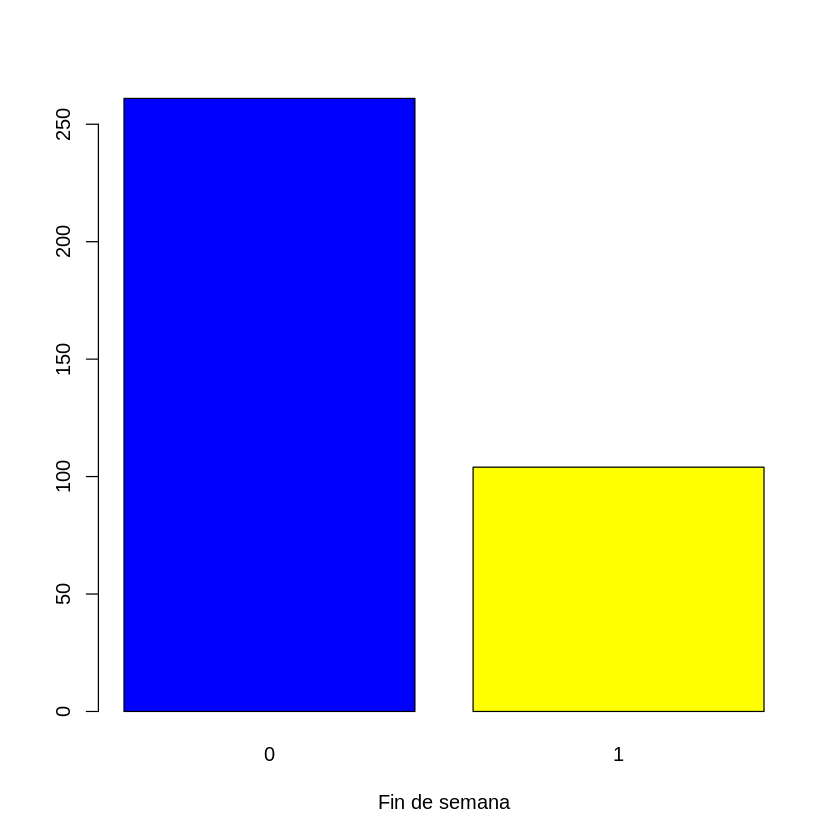

In [20]:
barplot(tab, col = c("blue", "yellow"), xlab = 'Fin de semana')

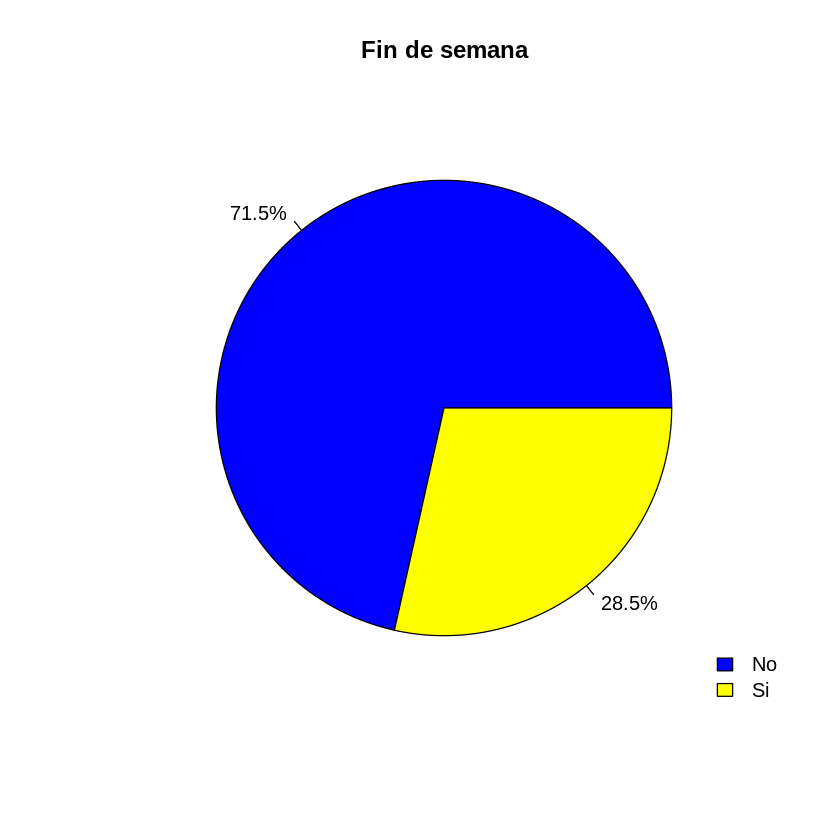

In [21]:
pr <- round(tab / 365 * 100, 1)
porcentajes <- paste(pr, "%", sep="")
categoria <- c("No", "Si") 

pie(tab, col = c("blue", "yellow"), main = "Fin de semana", labels = porcentajes)
legend('bottomright', legend = categoria, bty = 'n', fill = c("blue", "yellow"))


No es de extrañarse que los días registrados como fin de semana representen el 28.5% de las observaciones, ya que al haber tomado una observación por día durante un año (2015) este porcentaje es el esperado, ya que los fines de semana representan 2/7 del total de días.

#### Variable: Consumodecerveja

In [22]:
summary(df$Consumodecerveja)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  14.34   22.01   24.87   25.40   28.63   37.94 

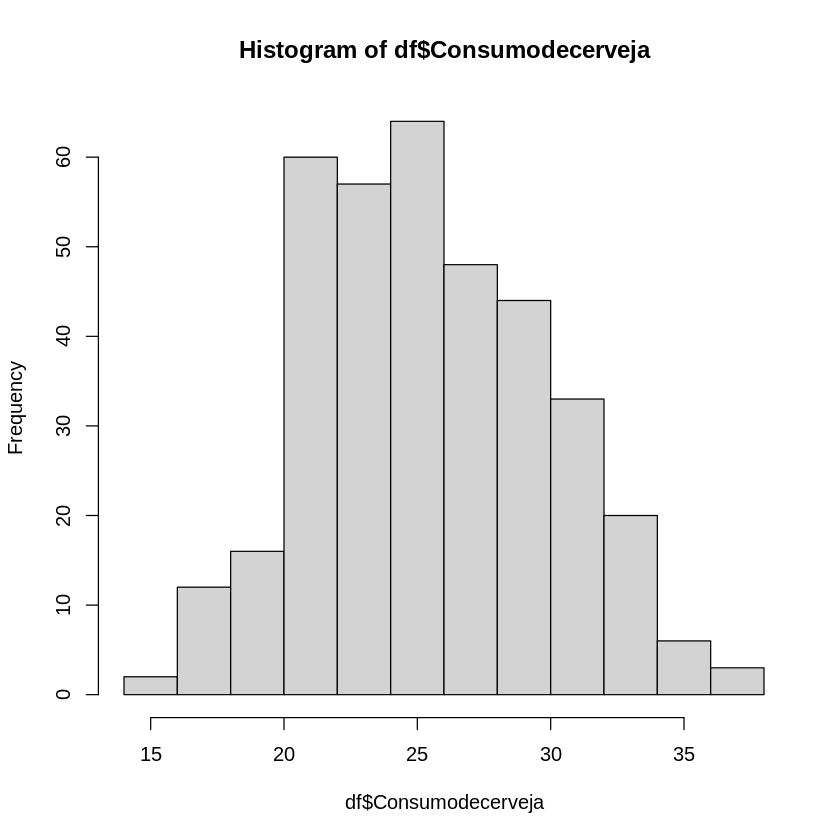

In [23]:
hist(df$Consumodecerveja)

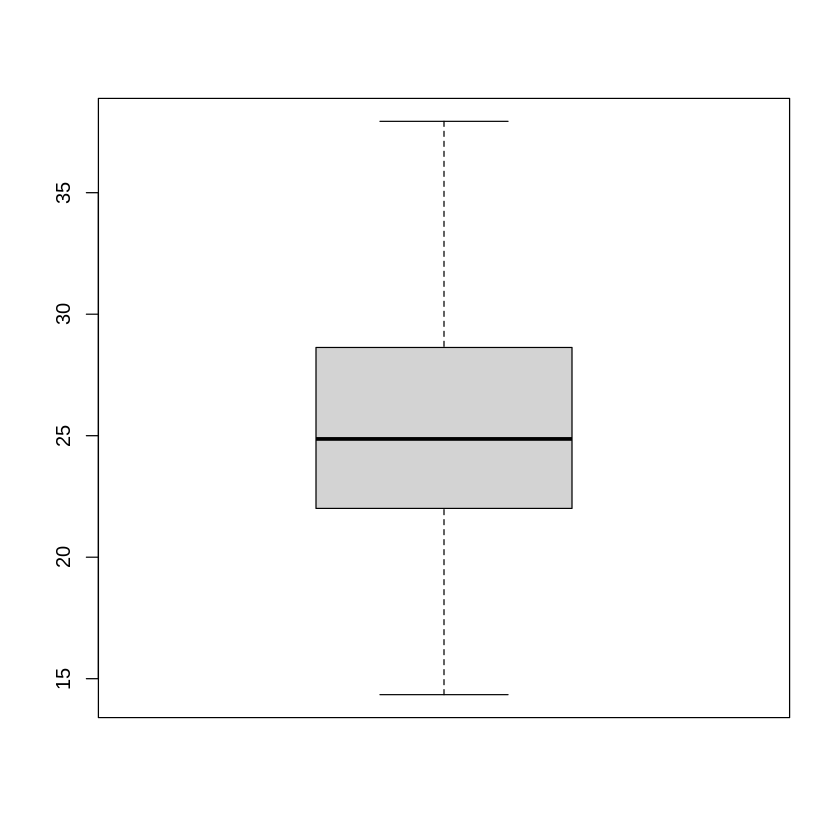

In [24]:
boxplot(df$Consumodecerveja)

De la exploración anterior para la variable de respuesta que representa el consumo de cerveza en miles de litros (Kl), podemos observar que hubo un mínimo de 14.3 Kl, un máximo de 37.9 Kl, un rango entre los dos anteriores valores no tan grande. También se observa una media de 25.9 KL, un valor casi en el centro dentro del conjunto de datos registrados.

Para este variable se puede observar en el diagrama de caja que no hay algún valor atípico.

### 3. Exploración de los coeficientes de correlación y pre-identificación de predictores significativos para la variable de respuesta.

#### Coeficientes de correlación.

In [28]:
X <- df[ , c("TemperaturaMedia", "TemperaturaMinima", "TemperaturaMaxima", "Precipitacao", "FinaldeSemana")]
Y <- df$Consumodecerveja

In [31]:
cor(X, Y)

TemperaturaMedia,0.5746147
TemperaturaMinima,0.3925087
TemperaturaMaxima,0.6426725
Precipitacao,-0.1937843
FinaldeSemana,0.5059805


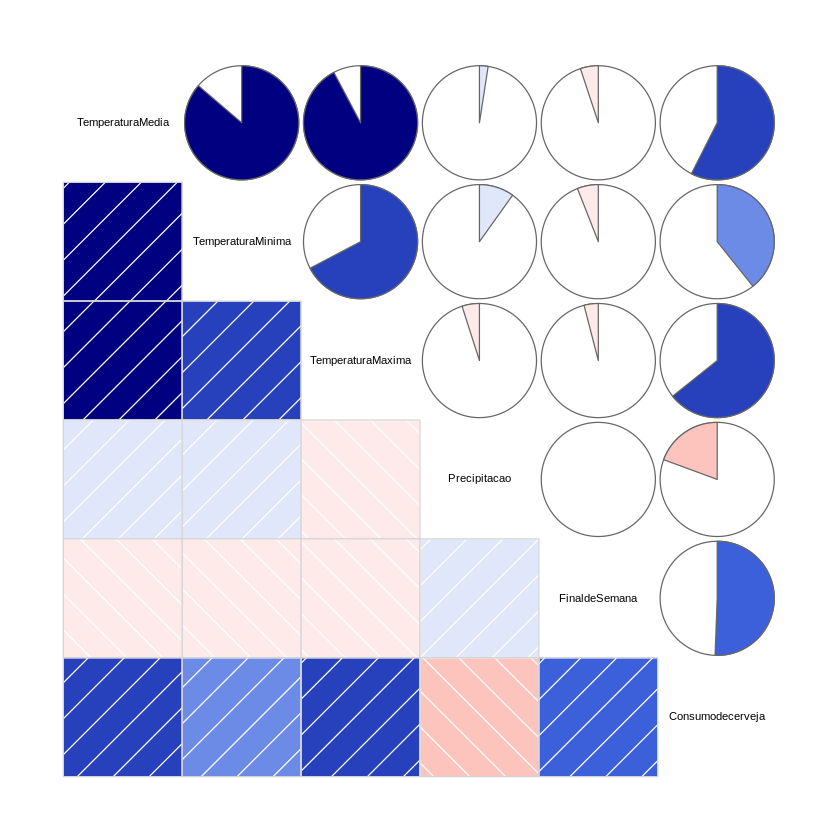

In [32]:
corrgram(df, lower.panel=panel.shade, upper.panel=panel.pie)

Observemos que en los resultados anteriores donde se aprecia la correlación entre la variable de respuesta y cada una de las variables predictoras (tanto númericamente como gráficamente), que hay 3 de estas ultimas variables que superan una correlación de 0.5 en valor absoluto, lo cual nos da una idea de que predictores podrian ser significativos. Estas variables son la temperatura máxima (TemperaturaMaxima), la temperatura media (TemperaturaMedia) y si es fin de semana (FinaldeSemana), predictores mencionados en orden descendente según su valor absoluto de correlación u orden ascendente según su nivel de posible significancia.

#### Gráficas de dispersión.

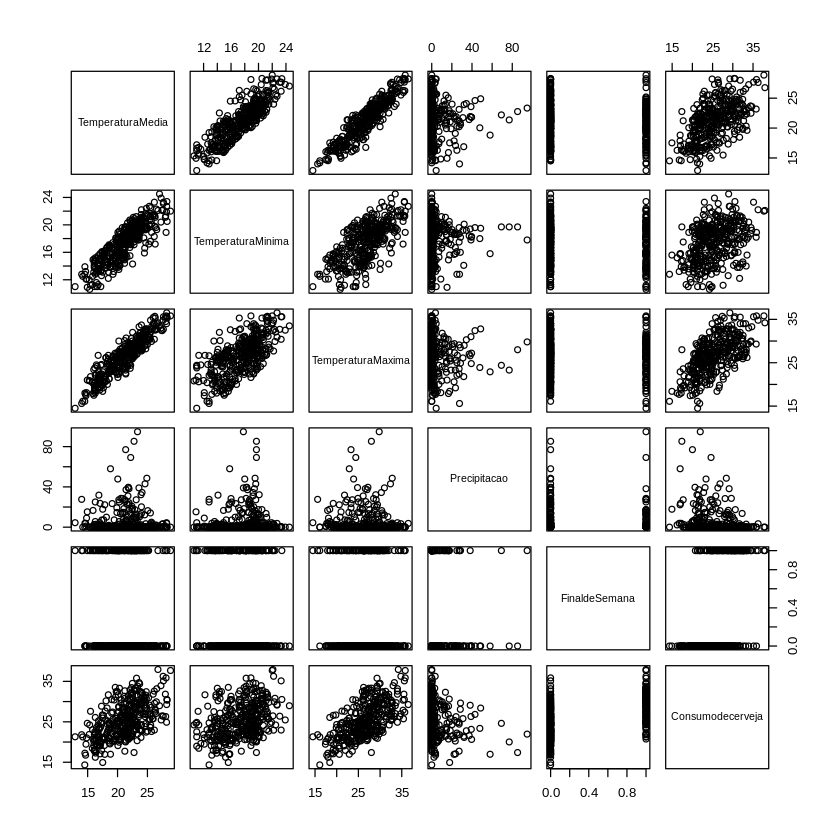

In [33]:
pairs(df)

Las gráficas de dispersión (de la última fila) reflejan los mismos resultados obtenidos a los anteriores respecto a cuales pueden ser los predictores más significativos, la variable *TemperaturaMaxima* muestra una correlacion lineal positiva entre la nube de puntos algo fuerte, luego le sigue la variable *TemperaturaMedia* en donde igual se observa una correlación lineal positiva con su nube de puntos un poco más dispersa que la anterior y en el caso de la variable que representa si es fin de semana o no (*FinaldeSemana*) solo podemos ver observaciones en 0 (entre semana) y 1 (fin de semana) teniendo más observaciones los días entre semana. 

Por otra parte se puede observar como la variable *TemperaturaMinima* parece tener una correlación lineal muy ligera con una nube de puntos que se encuentran centrados, con esto se entiende que su coeficiente de correlación solo sea de 0.39. Mientras que la variable *Precipitacao* muestra una nula una correlación lineal.

### 4. Promedio de consumo de cerveza en fin de semana y entre semana.

In [34]:
# Dataframe solo con observaciones relacionadas a la variable que representa si es fin de semana.
df_con_var_bin <- df %>% 
    mutate(FinaldeSemanaYes = ifelse(FinaldeSemana == 1, 1, 0)) %>% 
    mutate(FinaldeSemanaNo = ifelse(FinaldeSemana == 0, 1, 0))
df_con_var_bin <- df_con_var_bin[ , c("FinaldeSemana", "FinaldeSemanaYes", "FinaldeSemanaNo")]

head(df_con_var_bin)

,FinaldeSemana,FinaldeSemanaYes,FinaldeSemanaNo
,<int>,<dbl>,<dbl>
1,0,0,1
2,0,0,1
3,1,1,0
4,1,1,0
5,0,0,1
6,0,0,1


Cálculo del consumo de cervaza promedio en fin de semana y entre semana.

In [49]:
# Promedio de consumo de cerveza (en miles de litros) en fin se semana.
prom_consumo_fin <- mean(df$Consumodecerveja * df_con_var_bin$FinaldeSemanaYes)
# Promedio de consumo de cerveza (en miles de litros) entre semana.
prom_consumo_entre <- mean(df$Consumodecerveja * df_con_var_bin$FinaldeSemanaNo)

prom_consumo_cerveza <- data.frame(prom_consumo_fin, prom_consumo_entre)
colnames(prom_consumo_cerveza) <- c("Fin de semana", "Entre semana")
prom_consumo_cerveza

Fin de semana,Entre semana
<dbl>,<dbl>
8.240995,17.16037


Como ya se habia visualizado en la gráfica de dispersión anteriormente, hay más observaciones de consumo de cerveza cuando es entre semana, de ahí que el promedio de consumo de cerveza sea menor en fin de semana (8.24 Kl) que entre semana (17.16 Kl), lo cual es entendible porque estamos comparando cuanto se consume en promedio en 2 días contra 5 días, por lo que otra comparación interesante seria conocer cuanta cerveza se consume por día en ambos tipos de días.

Cálculo del consumo de cervaza promedio en fin de semana y entre semana por día.

In [51]:
prom_consumo_cerveza_por_dia <- data.frame(prom_consumo_fin/2, prom_consumo_entre/5)
colnames(prom_consumo_cerveza_por_dia) <- c("Día de fin de semana", "Día entre semana")
prom_consumo_cerveza_por_dia

Día de fin de semana,Día entre semana
<dbl>,<dbl>
4.120497,3.432075


Ahora podemos notar que en promedio, en un día de fin de semana se consume aproximadamente 0.69 (miles de litros) más que en un día entre semana, un comportamiento de cierta manera esperado.

## Modelado

### 5. Ajuste de un modelo lineal para explicar el consumo de cerveza a partir del resto de predictores. Estrategia "backward" aplicada al p-valor.


Para realizar el ajuste de un modelo lineal, se hara uso de la estrategia "backward" tambien conocida como de "arriba a abajo", con esta estrategia se pretende ir eliminando iterativamente los predictores menos significativos (con el mayor p-valor) para al final obtener solamente los predictores significativos. 

Se realizará de 2 maneras, de forma manual y de forma automatizada, esto es con el objetivo de corroborar que se llega al mismo resultado.

#### Forma manual.

In [52]:
# Construimos un modelo lineal.
r <- lm(Consumodecerveja ~ TemperaturaMedia+TemperaturaMinima
        +TemperaturaMaxima+Precipitacao+FinaldeSemana, data = df)
summary(r)


Call:
lm(formula = Consumodecerveja ~ TemperaturaMedia + TemperaturaMinima + 
    TemperaturaMaxima + Precipitacao + FinaldeSemana, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.8824 -1.9065  0.0066  1.8778  5.4253 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)        6.44470    0.84504   7.627 2.18e-13 ***
TemperaturaMedia   0.03080    0.18800   0.164    0.870    
TemperaturaMinima -0.01903    0.11036  -0.172    0.863    
TemperaturaMaxima  0.65600    0.09515   6.895 2.44e-11 ***
Precipitacao      -0.05747    0.01004  -5.726 2.17e-08 ***
FinaldeSemana      5.18318    0.27101  19.126  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.333 on 359 degrees of freedom
Multiple R-squared:  0.7226,	Adjusted R-squared:  0.7188 
F-statistic: 187.1 on 5 and 359 DF,  p-value: < 2.2e-16


La variable *TemperaturaMedia* tiene el mayor p-valor, con un valor de 0.870, por lo que volvemos a construir un modelo lineal pero ahora sin considerar esta variable.

In [53]:
r <- lm(Consumodecerveja ~ TemperaturaMinima+TemperaturaMaxima+Precipitacao+FinaldeSemana, 
        data = df)
summary(r)


Call:
lm(formula = Consumodecerveja ~ TemperaturaMinima + TemperaturaMaxima + 
    Precipitacao + FinaldeSemana, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.8837 -1.8929  0.0142  1.8732  5.4854 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)        6.45323    0.84229   7.662 1.72e-13 ***
TemperaturaMinima -0.00381    0.05942  -0.064    0.949    
TemperaturaMaxima  0.67023    0.03872  17.311  < 2e-16 ***
Precipitacao      -0.05738    0.01001  -5.734 2.08e-08 ***
FinaldeSemana      5.18331    0.27064  19.152  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.33 on 360 degrees of freedom
Multiple R-squared:  0.7226,	Adjusted R-squared:  0.7195 
F-statistic: 234.5 on 4 and 360 DF,  p-value: < 2.2e-16


Ahora la variable *TemperaturaMinima* tiene el mayor p-valor, con un valor de 0.949, por lo que volvemos a construir un modelo lineal pero ahora sin considerar esta variable.

In [54]:
r <- lm(Consumodecerveja ~ TemperaturaMaxima+Precipitacao+FinaldeSemana, data = df)
summary(r)


Call:
lm(formula = Consumodecerveja ~ TemperaturaMaxima + Precipitacao + 
    FinaldeSemana, data = df)

Residuals:
   Min     1Q Median     3Q    Max 
-4.892 -1.904  0.010  1.868  5.495 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)        6.432085   0.773978   8.310 1.96e-15 ***
TemperaturaMaxima  0.668543   0.028301  23.622  < 2e-16 ***
Precipitacao      -0.057489   0.009832  -5.847 1.12e-08 ***
FinaldeSemana      5.184083   0.269998  19.200  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.326 on 361 degrees of freedom
Multiple R-squared:  0.7226,	Adjusted R-squared:  0.7203 
F-statistic: 313.5 on 3 and 361 DF,  p-value: < 2.2e-16


Finalmente hemos llegado a un resultado donde todos los p-valor de los predictores restantes son muy pequeños, lo que nos permite rechazar la hipótesis nula, por lo que hemos encontrado los predictores más significativos.

#### Forma automatizada. Uso de la función `stepAIC()`

Se crea un modelo saturado, es decir, el modelo mayor a considerar.

In [55]:
modelo_saturado <- lm(Consumodecerveja ~ ., data = df)
summary(modelo_saturado)


Call:
lm(formula = Consumodecerveja ~ ., data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.8824 -1.9065  0.0066  1.8778  5.4253 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)        6.44470    0.84504   7.627 2.18e-13 ***
TemperaturaMedia   0.03080    0.18800   0.164    0.870    
TemperaturaMinima -0.01903    0.11036  -0.172    0.863    
TemperaturaMaxima  0.65600    0.09515   6.895 2.44e-11 ***
Precipitacao      -0.05747    0.01004  -5.726 2.17e-08 ***
FinaldeSemana      5.18318    0.27101  19.126  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.333 on 359 degrees of freedom
Multiple R-squared:  0.7226,	Adjusted R-squared:  0.7188 
F-statistic: 187.1 on 5 and 359 DF,  p-value: < 2.2e-16


Se aplica la estrategia "backward".

In [56]:
modback <- stepAIC(modelo_saturado, trace=TRUE, direction="backward")

Start:  AIC=624.32
Consumodecerveja ~ TemperaturaMedia + TemperaturaMinima + TemperaturaMaxima + 
    Precipitacao + FinaldeSemana

                    Df Sum of Sq    RSS    AIC
- TemperaturaMedia   1      0.15 1953.9 622.35
- TemperaturaMinima  1      0.16 1953.9 622.35
<none>                           1953.7 624.32
- Precipitacao       1    178.44 2132.2 654.23
- TemperaturaMaxima  1    258.69 2212.4 667.71
- FinaldeSemana      1   1990.69 3944.4 878.76

Step:  AIC=622.35
Consumodecerveja ~ TemperaturaMinima + TemperaturaMaxima + Precipitacao + 
    FinaldeSemana

                    Df Sum of Sq    RSS    AIC
- TemperaturaMinima  1      0.02 1953.9 620.36
<none>                           1953.9 622.35
- Precipitacao       1    178.44 2132.3 652.25
- TemperaturaMaxima  1   1626.49 3580.4 841.41
- FinaldeSemana      1   1990.80 3944.7 876.78

Step:  AIC=620.36
Consumodecerveja ~ TemperaturaMaxima + Precipitacao + FinaldeSemana

                    Df Sum of Sq    RSS    AIC
<none>   

Resumen del modelo lineal ajustado con los predictores más significativos que quedaron.

In [57]:
summary(modback)


Call:
lm(formula = Consumodecerveja ~ TemperaturaMaxima + Precipitacao + 
    FinaldeSemana, data = df)

Residuals:
   Min     1Q Median     3Q    Max 
-4.892 -1.904  0.010  1.868  5.495 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)        6.432085   0.773978   8.310 1.96e-15 ***
TemperaturaMaxima  0.668543   0.028301  23.622  < 2e-16 ***
Precipitacao      -0.057489   0.009832  -5.847 1.12e-08 ***
FinaldeSemana      5.184083   0.269998  19.200  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.326 on 361 degrees of freedom
Multiple R-squared:  0.7226,	Adjusted R-squared:  0.7203 
F-statistic: 313.5 on 3 and 361 DF,  p-value: < 2.2e-16


#### Resultados e interpretación del ajuste del modelo.

Como se puede apreciar en el resumen final de ambas formas aplicadas los predictores que quedaron como los más significativos son los mismos, también el resto de información coincide en ambos resumenes, por lo que podemos estar seguros de haber obtenido el resultado correcto.
A continuación se listan estos 3 predictores más significativos junto a su interpretación en base al signo de su estimación:

* **TemperaturaMaxima**. Interpretación: A mayor temperatura mayor consumo de cerveza.
* **Precipitacao**. Interpretación: A mayor precipitación pluvial menor consumo de cerveza.
* **FinaldeSemana**. Interpretación: En los fines de semana se espera un mayor consumo de cerveza.



Modelo estimado:

$$\text{Consumodecerveja } = 6.432085 + 0.668543\text{(TemperaturaMaxima)} -0.057489\text{(Precipitacao)} + 5.184083\text{(FinaldeSemana)}$$

Como observación cuando se realizo la correlación de cada predictor con la variable de respuesta pre-identificamos acertadamente 2 de los predictores más significativos: *TemperaturaMaxima* y *FinaldeSemana*.

### 6. Ajuste de un modelo lineal. Estrategia "forward" aplicada al $R^2$.


En la estrategia "forward" o de "abajo a arriba" el valor que sirve de guia es el coeficiente de determinación. 

En este estrategia se empieza construyendo modelos tentativos con un solo predictor, se identifica el predictor con el mayor coeficiente de determinación y se agrega al modelo definitivo. Después hay que explorar entre los predictores restantes agregándolos al predictor seleccionado inicialmente para construir modelos con dos predictores y se selecciona el predictor que, agregado al inicial, brinde el mayor valor del $R^2$. Se continúa con el proceso hasta que no sea posible agregar al modelo definitivo un predictor nuevo que aumente signficativamente la $R^2$.

Al igual que con la estrategia "backward", esta nueva estrategia es posible realizarla de forma automatizada con ayuda de la libreria *MASS* y la funcion `stepAIC`.

Se crea un modelo vacio del cual se iniciara el proceso y se define además la formula que representará el punto final de búsqueda, la cual es la funcion que representa la variable de respuesta en función de la combinación lineal de los predictores.

In [61]:
modelo_vacio <- lm(Consumodecerveja ~ 1, data = df)
horizonte <- formula(Consumodecerveja ~ TemperaturaMedia+TemperaturaMinima
        +TemperaturaMaxima+Precipitacao+FinaldeSemana)

Se aplica la estrategia "forward".

In [62]:
modforw <- stepAIC(modelo_vacio, trace=TRUE, direction="forward", scope=horizonte)

Start:  AIC=1082.43
Consumodecerveja ~ 1

                    Df Sum of Sq    RSS     AIC
+ TemperaturaMaxima  1   2909.49 4134.8  889.96
+ TemperaturaMedia   1   2325.90 4718.4  938.15
+ FinaldeSemana      1   1803.45 5240.8  976.48
+ TemperaturaMinima  1   1085.27 5959.0 1023.36
+ Precipitacao       1    264.53 6779.8 1070.46
<none>                           7044.3 1082.43

Step:  AIC=889.96
Consumodecerveja ~ TemperaturaMaxima

                    Df Sum of Sq    RSS    AIC
+ FinaldeSemana      1   1995.84 2139.0 651.39
+ Precipitacao       1    185.54 3949.3 875.21
<none>                           4134.8 889.96
+ TemperaturaMinima  1     20.56 4114.2 890.14
+ TemperaturaMedia   1     15.77 4119.0 890.57

Step:  AIC=651.39
Consumodecerveja ~ TemperaturaMaxima + FinaldeSemana

                    Df Sum of Sq    RSS    AIC
+ Precipitacao       1   185.058 1953.9 620.36
<none>                           2139.0 651.39
+ TemperaturaMinima  1     6.636 2132.3 652.25
+ TemperaturaMedia   1

Resumen del modelo lineal ajustado con los predictores más significativos que quedaron.

In [63]:
summary(modforw)


Call:
lm(formula = Consumodecerveja ~ TemperaturaMaxima + FinaldeSemana + 
    Precipitacao, data = df)

Residuals:
   Min     1Q Median     3Q    Max 
-4.892 -1.904  0.010  1.868  5.495 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)        6.432085   0.773978   8.310 1.96e-15 ***
TemperaturaMaxima  0.668543   0.028301  23.622  < 2e-16 ***
FinaldeSemana      5.184083   0.269998  19.200  < 2e-16 ***
Precipitacao      -0.057489   0.009832  -5.847 1.12e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.326 on 361 degrees of freedom
Multiple R-squared:  0.7226,	Adjusted R-squared:  0.7203 
F-statistic: 313.5 on 3 and 361 DF,  p-value: < 2.2e-16


Nuevamente los predictores mas significativos son: *TemperaturaMaxima*, *FinaldeSemana* y *Precipitacao*.

Y el modelo estimado es:

$$\text{Consumodecerveja } = 6.432085 + 0.668543\text{(TemperaturaMaxima)} -0.057489\text{(Precipitacao)} + 5.184083\text{(FinaldeSemana)}$$

Observemos que **se llego al mismo modelo del punto anterior** en donde se utilizo la estrategia "backward".

### 8. Descripción del Criterio de Información de Akaike (AIC - Akaike Information Criterion).

El criterio de información de Akaike (AIC) es una medida de la calidad relativa de un modelo estadístico, para un conjunto dado de datos. Dada una colección de modelos para los datos, AIC estima la calidad de cada modelo, en relación con cada uno de los otros modelos. Por lo tanto, AIC proporciona un medio para la selección de modelos.

La formula esta definida como:

$$AIC = - 2 \times \text{Log-likelihood} + k \times n_{par}$$

Donde:

* $\text{Log-likelihood}$ corresponde al valor de log-verosimilitud del modelo para el vector de parámetros $\hat{\Theta}$.

* $k$ es un valor de penalización por el exceso de parámetros. Esta penalización desalienta el sobreajuste.

* $n_{par}$ corresponde al número de parámetros del modelo.


El mejor modelo será aquel que:

* El valor de $\text{Log-likelihood}$ sea mayor.
* El valor del $AIC$ sea menor.

Ya hemos conocido los métodos para realizar la selección de variables "Forward" y "Backward". En ambos métodos:

* Un término ingresa al modelo si su presencia disminuye el AIC.

* Un término sale del modelo si su ausencia disminuye el AIC.

La funcion `stepAIC` del paquete *MASS* realiza la selección de modelo paso a paso por AIC basandose en las dos anteriores condiciones. Ademas de los valores que se le fueron indicados a la función cuando fue utilizada, el único valor que no fue proporcionado fue el de $k$, en donde por defecto se le asigna el valor de 2.

Hay que tener en cuenta que AIC no dice nada sobre la calidad absoluta de un modelo, solo la calidad relativa a otros modelos. Por lo tanto, si todos los modelos candidatos se ajustarán mal, AIC no dará ninguna advertencia al respecto. Es por eso que después de seleccionar un modelo a través de AIC, suele ser una buena práctica validar la calidad absoluta del modelo. Dicha validación comúnmente incluye verificaciones de los residuos del modelo (para determinar si los residuos parecen aleatorios) y pruebas de las predicciones del modelo.

## Evaluación e interpretación

### 9. Reporte de intervalos de confianza (95%) para cada predictor.


In [64]:
# Construimos nuevamente el modelo lineal completo.
r <- lm(Consumodecerveja ~ TemperaturaMedia+TemperaturaMinima
        +TemperaturaMaxima+Precipitacao+FinaldeSemana, data = df)
summary(r)


Call:
lm(formula = Consumodecerveja ~ TemperaturaMedia + TemperaturaMinima + 
    TemperaturaMaxima + Precipitacao + FinaldeSemana, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.8824 -1.9065  0.0066  1.8778  5.4253 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)        6.44470    0.84504   7.627 2.18e-13 ***
TemperaturaMedia   0.03080    0.18800   0.164    0.870    
TemperaturaMinima -0.01903    0.11036  -0.172    0.863    
TemperaturaMaxima  0.65600    0.09515   6.895 2.44e-11 ***
Precipitacao      -0.05747    0.01004  -5.726 2.17e-08 ***
FinaldeSemana      5.18318    0.27101  19.126  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.333 on 359 degrees of freedom
Multiple R-squared:  0.7226,	Adjusted R-squared:  0.7188 
F-statistic: 187.1 on 5 and 359 DF,  p-value: < 2.2e-16


Se calculan los intervalos de confianza (95%) para cada predictor.

In [65]:
confint(r)

,2.5 %,97.5 %
(Intercept),4.78285514,8.10653758
TemperaturaMedia,-0.33892425,0.40051543
TemperaturaMinima,-0.23606359,0.19799376
TemperaturaMaxima,0.46888294,0.84311858
Precipitacao,-0.07720685,-0.03773192
FinaldeSemana,4.65021995,5.71614151


Del resultado anterior podemos afirmar con un 95% de confianza que:

* TemperaturaMedia $\in$ [-0.34, 0.40]
* TemperaturaMinima $\in$ [-0.24, 0.20]
* TemperaturaMaxima $\in$ [0.47, 0.84]
* Precipitacao $\in$ [-0.08, -0.04]
* FinaldeSemana $\in$ [4.65, 5.72]

En la siguiente tabla, podemos encontrar el limite inferior, el valor estimado exacto y el límite superior para la estimación de cada predictor, con el objetivo ver que tanto cambia el valor estimado al extremo izquierdo asi como al extremo derecho, con los valores redondeados a 2 decimales.

In [66]:
est <- data.frame(confint(r))
est["Estimación"] = coefficients(r)
colnames(est) <- c("Límite inferior", "Límite superior", "Estimación")

round(est, 2) %>%
    dplyr::select("Límite inferior", "Estimación", "Límite superior")

,Límite inferior,Estimación,Límite superior
,<dbl>,<dbl>,<dbl>
(Intercept),4.78,6.44,8.11
TemperaturaMedia,-0.34,0.03,0.40
TemperaturaMinima,-0.24,-0.02,0.20
TemperaturaMaxima,0.47,0.66,0.84
Precipitacao,-0.08,-0.06,-0.04
FinaldeSemana,4.65,5.18,5.72


Como se hizo una predicción para todos los predictores el modelo de regresión lineal también contiene a todos los predictores. 

Sin embargo igual sería interesante conocer cuales son los intervalos de confianza solamente para los predictores más significativos junto a su estimación exacta, esto se presenta a continuación:

In [67]:
r_sig <- lm(Consumodecerveja ~ TemperaturaMaxima+Precipitacao+FinaldeSemana, data = df)
est_sig <- data.frame(confint(r_sig))
est_sig["Estimación"] = coefficients(r_sig)
colnames(est_sig) <- c("Límite inferior", "Límite superior", "Estimación")

round(est_sig, 2) %>%
    dplyr::select("Límite inferior", "Estimación", "Límite superior")

,Límite inferior,Estimación,Límite superior
,<dbl>,<dbl>,<dbl>
(Intercept),4.91,6.43,7.95
TemperaturaMaxima,0.61,0.67,0.72
Precipitacao,-0.08,-0.06,-0.04
FinaldeSemana,4.65,5.18,5.72


Como se puede observar al realizar el modelo lineal sin tomar en cuenta todos los predictores algunos valores en los limites o la estimación cambiaron ligeramente.

### 10. Generación de un intervalo de predicción.


Usando como base el mejor modelo encontrado en puntos anteriores, se construirá un intervalo de confianza del 95% para predecir el consumo de cerveza en un fin de semana que, según el sevicio meteorológico, tendrá una temperatura máxima de 32 grados, media de 27, mínima de 24, y sin precipitación pluvial.


Modelo final (mejor modelo encontrado):

$$\text{Consumodecerveja } = 6.432085 + 0.668543\text{(TemperaturaMaxima)} -0.057489\text{(Precipitacao)} + 5.184083\text{(FinaldeSemana)}$$

Si realizamos la predicción exacta con la información proporcionada para las variables predictoras correspondientes obtendriamos lo siguiente:

In [68]:
6.432085 + 0.668543*32 - 0.057489*0 + 5.184083*1

[1] 33.00954

A partir del resultado anterior podriamos decir que en un fin de semana, con una temperatura máxima de 32 °C, media de 27 °C, mínima de 24 °C, y sin precipitación pluvial se predice un consumo de cerveza de aproxidamente 33.01 miles de litros.

Dar una predicción exacta tiene el incoveniente de que el verdadero resultado podria variar un poco, por lo que es mejor proporcionar un intervalo para la predicción con cierto intervalo de confianza, de esta forma la persona que use la información de la predicción conocerá el rango de valores que esta podria tomar y asi pueda darle un mejor uso a la información.

A continuación se obtiene el intervalo de confianza del $95\%$ para la predicción de la variable de respuesta para *TemperaturaMaxima* = 32, *Precipitacao* = 0 y *FinaldeSemana* = 1.

In [69]:
# Volvemos a crear el modelo lineal con los predictores más significativos.
r <- lm(Consumodecerveja ~ TemperaturaMaxima+Precipitacao+FinaldeSemana, data = df)

n_x <- data.frame(TemperaturaMaxima = c(32),
                Precipitacao = c(0), 
                FinaldeSemana = c(1))
predict(r, newdata = n_x, interval = 'prediction')

,fit,lwr,upr
1,33.00953,28.40089,37.61818


Ahora, bajo las mismas condiciones anteriores, podemos informar que la predicción del consumo de cerveza es de 28.40 a 37.62 miles de litros, con un intervalo de confianza del 95%. 

### 11. Interpretación del modelo final. Revisión de la calidad del modelo a partir de la $R^2$.

Modelo final:

$$\text{Consumodecerveja } = 6.432085 + 0.668543\text{(TemperaturaMaxima)} -0.057489\text{(Precipitacao)} + 5.184083\text{(FinaldeSemana)}$$

Intepretación:

* **TemperaturaMaxima**. A mayor temperatura habrá un mayor consumo de cerveza.
* **Precipitacao**. A mayor precipitación pluvial menor consumo de cerveza.
* **FinaldeSemana**. En los fines de semana se espera un mayor consumo de cerveza.

Calidad del modelo.

In [70]:
summary(r)


Call:
lm(formula = Consumodecerveja ~ TemperaturaMaxima + Precipitacao + 
    FinaldeSemana, data = df)

Residuals:
   Min     1Q Median     3Q    Max 
-4.892 -1.904  0.010  1.868  5.495 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)        6.432085   0.773978   8.310 1.96e-15 ***
TemperaturaMaxima  0.668543   0.028301  23.622  < 2e-16 ***
Precipitacao      -0.057489   0.009832  -5.847 1.12e-08 ***
FinaldeSemana      5.184083   0.269998  19.200  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.326 on 361 degrees of freedom
Multiple R-squared:  0.7226,	Adjusted R-squared:  0.7203 
F-statistic: 313.5 on 3 and 361 DF,  p-value: < 2.2e-16


Como se puede observar en el resumen la $R^2 = 0.7226$ sin embargo para casos donde el modelo tiene más de un predictor es conveniente revisar el valor de la $R \text{ ajustada} = 0.7203$, que recordemos penaliza la cantidad de predictores precisamente para tener un mejor coeficiente de determinación para interpretar, en este caso ambos valores son muy similares, es más si los redondearamos a 2 decimales ambos tendrian un valor 0.72, con este valor  la proporción de varianza de la variable de respuesta explicada por el modelo es levemente alta lo cual indica que este modelo de regresión lineal multiple es adecuado para realizar predicciones.


Diagnostico final. Por último vamos a revisar si el modelo generativo que usamos es válido revisando gráficamente la dispersión y distribución de los residuos.

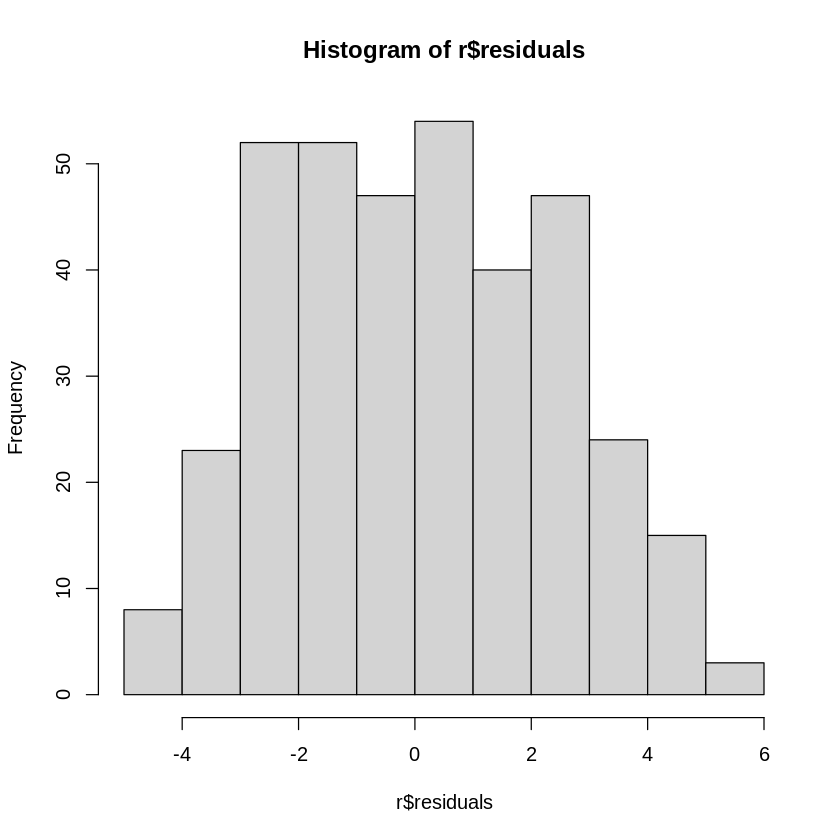

In [73]:
hist(r$residuals)

Como se puede apreciar en el gráfica anterior vemos que los residuos si siguen una distribución normal, si bien no es perfecta se distingue la forma de la campana en la frecuencia de estos. Además vemos que los residuos quedan centrados en 0, valor que la media de los residuos debe tener.

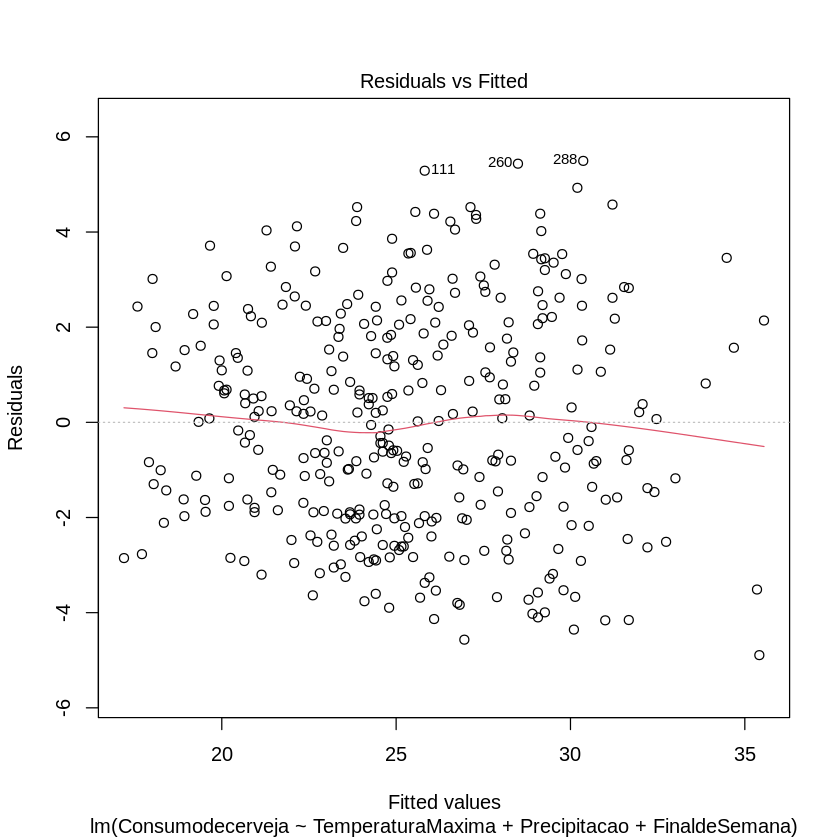

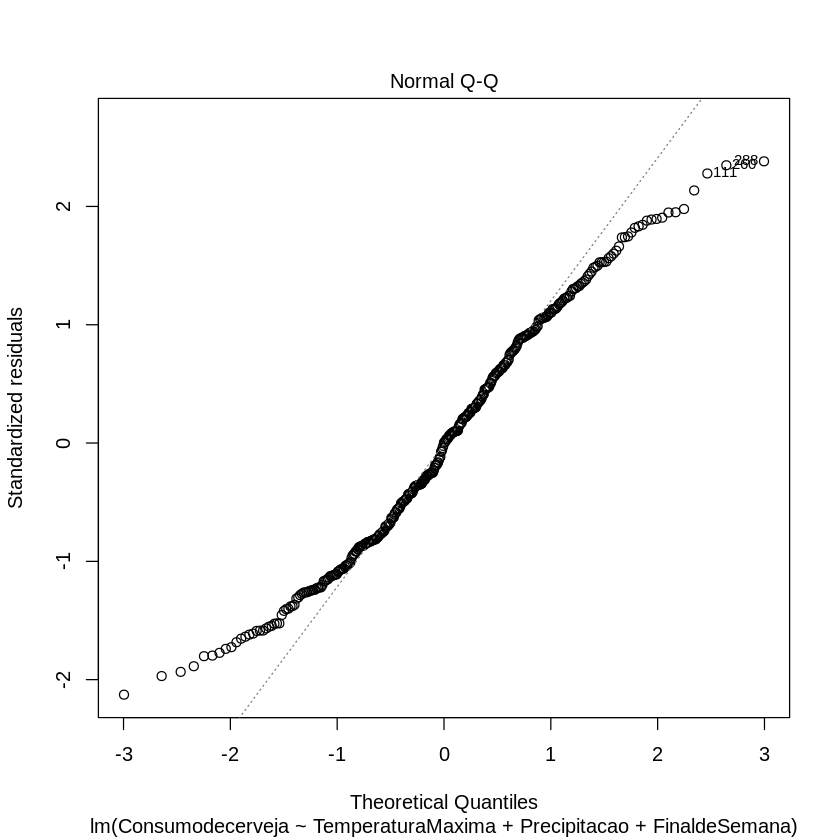

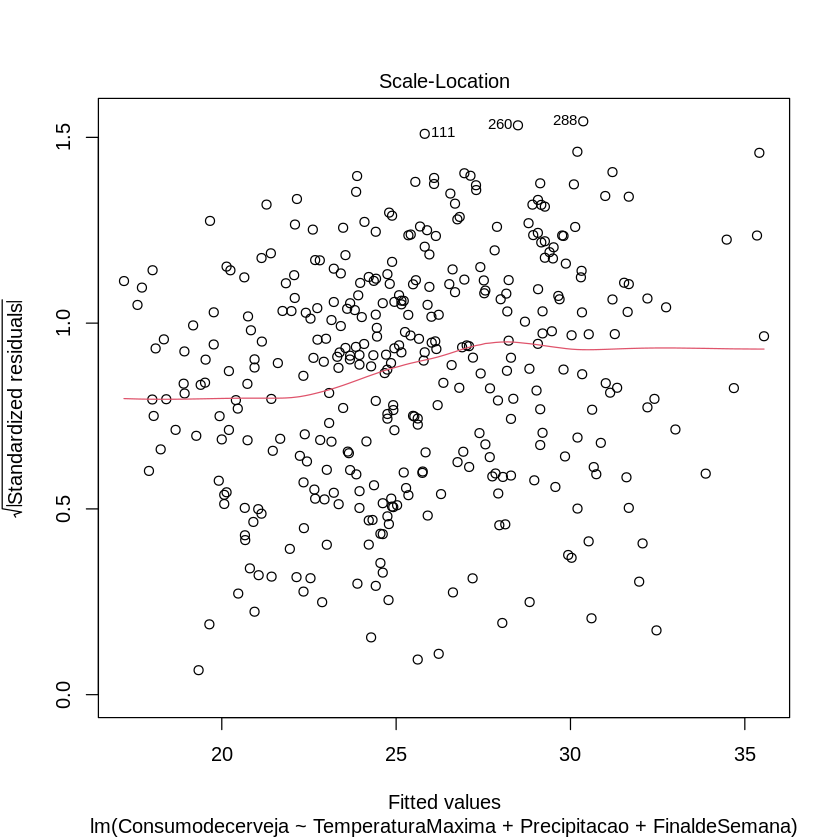

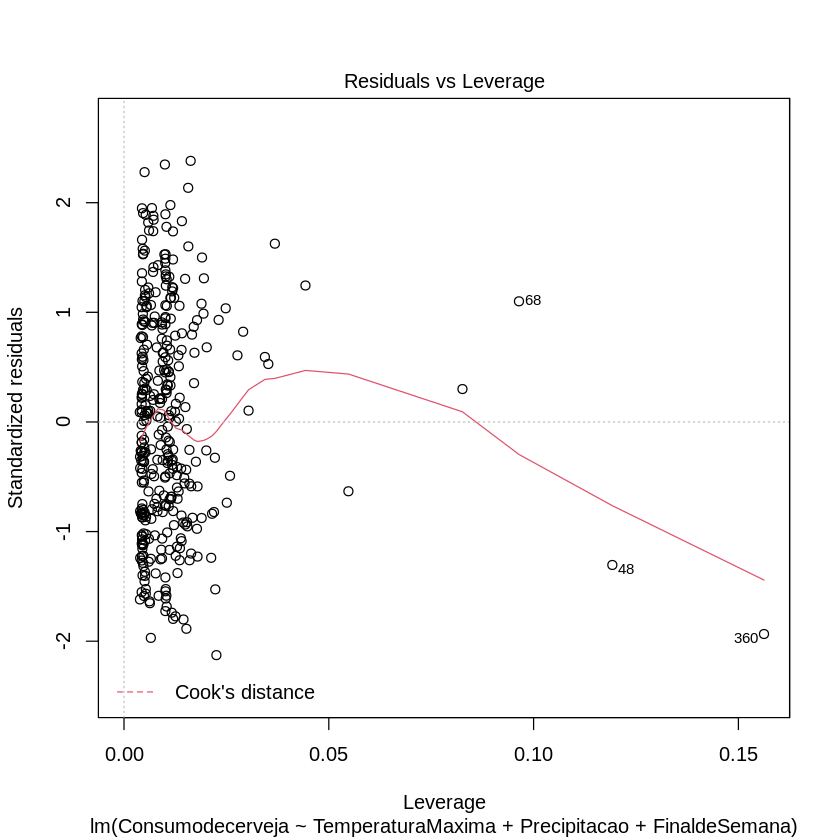

In [72]:
plot(r)

Por otra parte en la primera gráfica que representa los residuos contra los valores ajustados vemos que la tendencia que se muestra con la linea roja se ajusta mas o menos con la linea horizontal en 0 y que los residuos se distribuyen casi de forma simetrica alrededor de la misma linea horizontal en 0.

Con estas validaciones podemos justificar el uso del modelo generativo que fue de utilidad para el desarrollo de esta práctica.